# KUMARHANELER NEDEN HEP KAZANIR? ŞANS OYUNLARI PAHALI MI?

Tevfik Uyar, 10 Subat 2019 Acik Bilim bolumunde uzerinde durdugu bir konu olan olasilik ve beklenen deger kavramlarini excel makrosu uzerinden gayet guzel bir sekilde anlatti. 

Tevfik'in soylediklerine ek olarak da kazanc dagilimi ile ilgili de cok kucuk bir sey de ben eklemek isterim. 

Tevfik'in simulasyon grafiginde gosterdigi, 5 lira giris ucreti ve 10 liralik potansiyel kazanci olan bir yazi tura oyunundan bahsetti. Ve de birkac defa simulasyonlari calistirarak, aslinda kazancimizin her zaman garanti olmadigini gosterdi. Bir simulasyonda 1000 oyunun sonunda para kazanirken diger simulasyonda para kaybediyoruz. 

Beklenen kazanc Tevfik'in de belirttigi gibi 0 TLdir. Analitik olarak cozumleme yapinca %50 kazanma sansi olan bir oyunda 10 lira kazanma sansimiz varsa 5 lira ortalama oyun basina kazanabiliriz. Ancak giris ucreti de 5 lira oldugundan dolayi potansiyel kazancimiz 0 TL olacaktir. 

Tevfik videoda simulasyon sonuclarini gorsel bir sekilde degerlendirdi. Burada empirik olarak yaptigimiz birkac deneyin sonucunda icimizde olusan his, aslinda kazandigimiz olcude kaybedebilecegimizdi. Yani sezgisel olarak kazancimizin sifir oldugunu anladik. Benim bu konuda eklemek istedigim ise bunu, yani kazancimizin 0 TL oldugunu daha kesin bir sekilde gostermek.


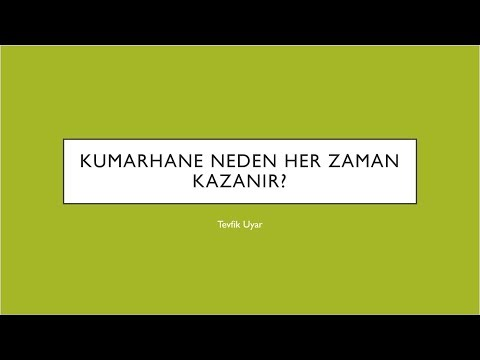

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('2weyvT6eqp8')

Buyuk oranda Tevfik'in Excel Makrosu uzerinde gosterdiklerini birkac Python fonksiyonu uzerinden tekrar anlatmaya calisacagim. Asagidakileri anlamak icin programalama bilmenize ihtiyac yok ancak bu deneyi kendiniz de yapmak isterseniz elinizde referans olarak asagidaki fonskiyonlari kullanabilirsiniz.


Gerekli kutuphaneleri yukluyoruz (vektorel analiz icin `numpy` cizdirmek icin de `seaborn` kutuphanelerini kullaniyorum). 
`Seed` kavramina asina degilseniz, onemsemeyin, Bu asagidaki deneyler rastgelelik iceren fonksiyonlara dayandigi icin buradaki sonuclari tekrar etmek isterseniz ayni `seed` degerini kullanirsaniz o zaman tamamen ayni sonuclara ulasabilirsiniz. Yani `seed` olasilksal hesaplamalarda tekrar edilebilirlik icin gereken bir parametre.

In [2]:
import numpy as np
import seaborn as sns

np.random.seed(seed=42)

Basit bir yazi tura oyunu fonsiyonu tanimlayalim, bu fonsiyon `giris_bedeli` odedigimiz ve %50 olasilikla belirtilen `odul` miktarini kazandigimiz , `n` sayidaki oyunlarin sonuclarini veren bir vektor.

In [3]:
def yazi_tura(giris_bedeli=5, odul=10, n=1000):
    """
    giris_bedeli: Oyunu her oynamak istedigimizde odememiz gereken miktar
    odul: Oyunu kazandigimiz takdirde alacagimiz odul miktari 
    n: Oyun sayisi
    """
    oyunlar = np.random.binomial(1, 0.5, n)*(odul) - giris_bedeli
    return oyunlar
    

Ornek olarak `5` lira giris bedelli ve `10` lira odullu `15` yazi tura oyununu oynarsak, her oyundaki kazanc dagilimimiz soyle olabilir:

In [4]:
oyunlar = yazi_tura(giris_bedeli=5, odul=10, n=15)

In [5]:
oyunlar

array([-5,  5,  5,  5, -5, -5, -5,  5,  5,  5, -5,  5,  5, -5, -5])

Yukaridaki sonuc bize her oyun sonundaki kazancimizi veriyor, 15 oyun boyunca baslangica gore cebimizdeki para miktarinin degisimini de Tevfik excel macrosu uzerinde gosterdi. Bunun icin de asagidaki fonsiyonu tanimlayalim

In [6]:
def oyun_kazanci(oyunlar):
    """
    Verilen bir yazi_tura oyunu serisi icin her noktadaki toplam kazanci hesapla
    """
    return oyunlar.cumsum()

Ustteki fonksiyonu daha acik anlamak icin `oyunlar` vektorune bakabiliriz


In [7]:
oyunlar

array([-5,  5,  5,  5, -5, -5, -5,  5,  5,  5, -5,  5,  5, -5, -5])

In [8]:
oyun_kazanci(oyunlar)

array([-5,  0,  5, 10,  5,  0, -5,  0,  5, 10,  5, 10, 15, 10,  5])

Ilk elde kaybetmis olsak da oyun sonunda 5 lira ile ayriliyoruz. Bu 15 oyunda sansliyiz diyebiliriz. Bunu bir de grafiksel olarak gorelim. Bunun icin de asagidaki fonksiyonu tanimlayalim

In [9]:
def oyun_kazanci_cizdir(oyunlar):
    x = np.arange(0, oyunlar.size)
    y = oyun_kazanci(oyunlar)
    return sns.lineplot(x=x, y=y)

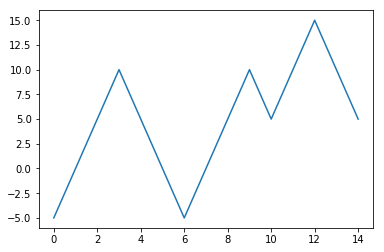

In [10]:
oyun_kazanci_cizdir(oyunlar)

Bu noktaya dek yaptiklarimiz Tevfik'in excel makrosu ile yaptiklarinin bir kopyasi. Isterseniz Tevfik'in yaptikarini birkac kez `n=1000` olacak sekilde deneyelim. 

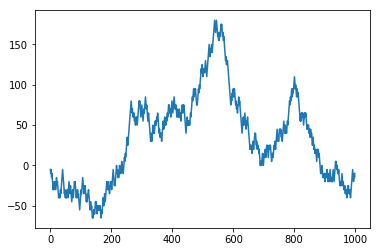

In [11]:
oyun_kazanci_cizdir(yazi_tura(n=1000))

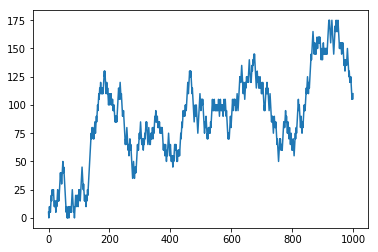

In [12]:
oyun_kazanci_cizdir(yazi_tura(n=1000))

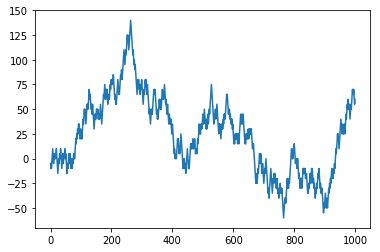

In [13]:
oyun_kazanci_cizdir(yazi_tura(n=1000))

Ustteki uc grafik bizlere her 1000 oyun sonucundaki cebimizdeki para miktarini gostermekte. Tevfik bu noktada bu sonuclari gostererek bizlere aslinda kazanma sansismizin her farkli 1000 oyunda garanti olmadigini ifade etti. Bu sezgisel olarak da bizlere dogru geliyor. Ancak simulasyonu bir adim daha oteye goturerek bu sezgiyi daha iyi bir sekilde ifade etme sansimiz var.

yukarida tanimladigimiz `oyun_kazanci` fonsiyonu bize `n` yazi tura oyunu sonundaki kazancimizi hesapliyordu. Yukaridaki 3 grafik de `1000` oyun sonucundaki kazanclarimizi gosteriyor. 

Peki bu 1000 oyunluk yazi tura serisini yukaridaki gibi 3 kez degil de 1000000 kez oynarsak ve de bu 1000000 oyunun sonucuda kazandiklarimizin dagilimina bakarsak bu bize ne verir? Asagidaki `oyun_kazanci` dagilimi fonksiyonu bize bunu hesapliyor.

In [14]:
def oyun_kazanci_dagilimi(n_oyun=1000000, **kwargs):
    """
    n_oyun defa yazi_tura(giris_bedeli=5, odul=10, n=1000) oyna
    ve tum yazi_tura oyunlarinin sonuclarini bir vektore kaydet
    """
    kazanc_vektoru = np.zeros(n_oyun)
    for i in range(n_oyun):
        oyun = yazi_tura(**kwargs)
        kazanc = np.add.reduce(oyun)
        kazanc_vektoru[i] = kazanc
    return kazanc_vektoru

Haydi 1000000 kez 1000lik yazi tura oyunu oynayalim. 

In [15]:
dagilim = oyun_kazanci_dagilimi(n_oyun=1000000)

In [16]:
dagilim

array([-150.,  -20.,  -40., ...,   70., -140.,   50.])

Yukarida her 1000 oyun sonucunda elimizdeki para mikartini gosteren 1000000 elemanli bir vektor var. Bazi oyunlarda para kaybederken bazilarinda ise para kazandik. Bu 1000000luk kazanc dagiliminin da ortalamasi bize gercekte ne kazanacagimizi verecektir.

In [17]:
dagilim.mean()

0.05592

her oyunun 5 lira giris ucreti oldugunu ve de 10 lira potansiyel kazanci oldugunu biliyoruz ama bu kadar oyunun sonunda ortalama kazanacagimiz miktar ise 5 kurus, pratikte ve teorik olarak limitte 0 lira.  

Isterseniz bir de bu 1000000 oyunun dagilimina grafiksel olarak bakalim. 

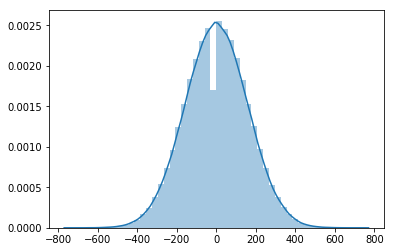

In [18]:
sns.distplot(dagilim)

gordugunuz gibi bircok oyundaki kazancimiz sifira yakin ancak cok az miktardaki oyunlarda neredeyse 600 liraya yakin kazanirken , ayni sekilde cok az miktarda oyunda da 600 liraya dek kaybettigimiz de olmus. Ama ortalama kazancimiz ~0 lira

Ilgisini cekenler icin yukaridaki dagilim `Normal` ya da diger adiyla `Gaussian` dagilimidir. Bu cok sayidaki deneyin sonuclarinin dagilimlarinin ortalamasi da `Merkezi Limit Kurami` olarak bilinir ve de bu `Gaussian` dagiliminin ortalama degeri bize yazi tura oyunun `beklenen degerini` verir

Daha da matematiksel olarak ilgisini cekenler icin aslinda bu yukaridaki grafik `binomial` dagilimin limitteki durumudur. Bircok olasiliksal dagilim aslinda `binomial` dagilimin belirli limitlerdeki yakinsamalari olarak bulunabilir. 

Son olarak yukarida gordugumuz her 1000 seferlik oyun grafigi de (Asagida bir tane daha var referans icin) `Sarhos yuruyusu` / `Drunkard's walk` dagilimi olarak bilinir. Baslangic noktasindan itibaren her x degeri icin y ekseninde rastgele -5 ya da +5 cm yuruyen bir sarhosun yurumesi olarak da ifade edebiliriz bu yazi tura oyununu.

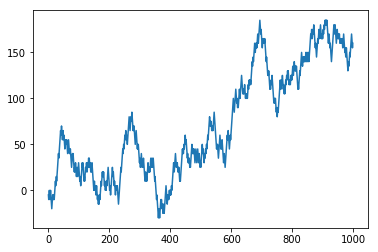

In [19]:
oyun_kazanci_cizdir(yazi_tura(n=1000))

Twitter :@oneryalcin